In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_natalidad = 'dataSets/natalidad_modificada.csv'
ruta_natalidad_riesgos_edad = 'dataSets/natalidad_riesgo_por_edades.csv'
df = pd.read_csv(ruta_natalidad, delimiter=';')
df_riesgos = pd.read_csv(ruta_natalidad_riesgos_edad, delimiter=';')

In [3]:
# Funciones necesarias
def cal_riesgos_edad(edad: int) -> list:
    def relacion(diferencia, valores: list) -> list:
        valores_convertidos = []
        porcentaje = 100 / sum(valores)
        for valor in valores:
            valores_convertidos.append(((diferencia / (valor * porcentaje)) * 100)+valor)
        return valores_convertidos

    min = False
    max = False
    intervalos = False
    azar = False
    consulta = None
    calculo = []
    minimo = df_riesgos['edad'].min()
    maximo = df_riesgos['edad'].max()
    if edad <= minimo:
        consulta = minimo
        min = True
    elif edad >= maximo:
        consulta = maximo
        max = True
    else:
        intervalos = True
        for riesgo in list(df_riesgos['edad']):
            if riesgo == edad == (minimo + 1):
                consulta = riesgo
            elif riesgo <= edad:
                consulta = riesgo
                azar = True
    if min:
        if consulta == edad:
            calculo = df_riesgos[df_riesgos['edad'] == consulta].values[0][1:]
        else:
            calculo = relacion((consulta-edad)*(np.random.choice([0.94,0.87])), df_riesgos[df_riesgos['edad'] == consulta].values[0][1:])
    if max:
        if consulta == edad:
            calculo = df_riesgos[df_riesgos['edad'] == consulta].values[0][1:]
        else:
            calculo = relacion((edad-consulta)*(np.random.choice([0.87,0.94])), df_riesgos[df_riesgos['edad'] == consulta].values[0][1:])
    if intervalos:
        if azar:
            if consulta == edad:
                calculo = df_riesgos[df_riesgos['edad'] == consulta].values[0][1:]
            else:
                def limite_mayor(resta)->bool:
                    diferencia_inferior = abs(resta - (minimo+1))
                    diferencia_superior = abs(resta - maximo)
                    if diferencia_inferior < diferencia_superior:
                        return False
                    else:
                        return True
                resta = edad-consulta
                calculo = relacion((resta*np.random.choice([0.15,0.2]))if limite_mayor(edad) else(resta*np.random.choice([0.05,0.09])), df_riesgos[df_riesgos['edad'] == consulta].values[0][1:])
        else:
            calculo = df_riesgos[df_riesgos['edad'] == consulta].values[0][1:]
    return calculo

def capitalizar_reemplazar(cadena:str)->str:
    cadena = cadena.capitalize()
    return cadena.replace('_', ' ')

In [4]:
# DataFrame que contiene los valores de % riesgos (debe leerse en intervalos)
df_riesgos

,edad,hipertension,diabetes,complicaciones_parto
0,19,10,5,8
1,20,5,3,4
2,30,8,6,7
3,40,15,10,12


In [5]:
# Crear orden para los meses del año del dataSet
orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['mes'] = pd.Categorical(df['mes'], categories=orden_meses, ordered=True)
df['ciudades'] = df['ciudades'].str.strip()
# Ordenar el DataFrame por las columnas especificadas
df.sort_values(by=['ciudades', 'mes', 'periodo', 'semanas_de_gestacion'], inplace=True)
# Limpiar ciudades
df['ciudades'] = df['ciudades'].str[3:]
# Generar colores
colores = ['#FF5733','#3498db','#2ecc71','#e74c3c','#9b59b6','#1abc9c',
           '#f39c12','#d35400','#2980b9','#27ae60','#c0392b','#8e44ad',
           '#16a085','#f1c40f','#2c3e50','#e67e22','#d35400','#3498db','#f39c12','#c0392b','#2980b9']
colores_back = colores
# Imprimir el DataFrame ordenado
df

,id,altura,peso,ciudades,mes,sexo,periodo,semanas_de_gestacion,edad
0,9583561486,147,84,Araba/Álava,Jan,M,2009,29,15
1,3573300483,151,101,Araba/Álava,Jan,F,2011,32,13
2,8869355811,154,82,Araba/Álava,Jan,M,2011,38,36
4,8647589999,177,63,Araba/Álava,Jan,F,2012,33,30
3,3436613120,187,49,Araba/Álava,Jan,M,2012,34,47
...,...,...,...,...,...,...,...,...,...
16743,7043785961,187,75,Melilla,Dec,M,2016,38,13
16744,7368556595,158,73,Melilla,Dec,F,2017,32,13
16745,2356524633,177,115,Melilla,Dec,M,2018,30,27
16746,5168976634,151,90,Melilla,Dec,F,2018,30,37


In [6]:
#1. **Distribución de Edades, Alturas y Pesos:**
#   - Histogramas de altura, peso y edades edades de las madres.
#   - Boxplots de altura, peso y edades de las madres.
#   - Correlación entre altura y peso.
#   - Correlación entre Altura y Edad.
#   - Correlación entre Altura y Edad.
#   - Estadísticas descriptivas (media, mediana, desviación estándar).
alturas = df['altura']
pesos = df['peso']
edades = df['edad']

In [7]:
# Calculando estadísticas descriptivas
media_alturas = alturas.mean()
mediana_alturas = alturas.median()
std_alturas = alturas.std()
media_pesos = pesos.mean()
mediana_pesos = pesos.median()
std_pesos = pesos.std()
media_edades = edades.mean()
mediana_edades = edades.median()
std_edades = edades.std()
# Redondeando las estadísticas a dos decimales
media_alturas = round(media_alturas, 2)
mediana_alturas = round(mediana_alturas, 2)
std_alturas = round(std_alturas, 2)
media_pesos = round(media_pesos, 2)
mediana_pesos = round(mediana_pesos, 2)
std_pesos = round(std_pesos, 2)
media_edades = round(media_edades, 2)
mediana_edades = round(mediana_edades, 2)
std_edades = round(std_edades, 2)
# Creando DataFrames con las estadísticas
alturas_df = pd.DataFrame({
    'Estadística': ['Media', 'Mediana', 'Desviación Estándar'],
    'Valor': [media_alturas, mediana_alturas, std_alturas]
})
pesos_df = pd.DataFrame({
    'Estadística': ['Media', 'Mediana', 'Desviación Estándar'],
    'Valor': [media_pesos, mediana_pesos, std_pesos]
})
edades_df = pd.DataFrame({
    'Estadística': ['Media', 'Mediana', 'Desviación Estándar'],
    'Valor': [media_edades, mediana_edades, std_edades]
})

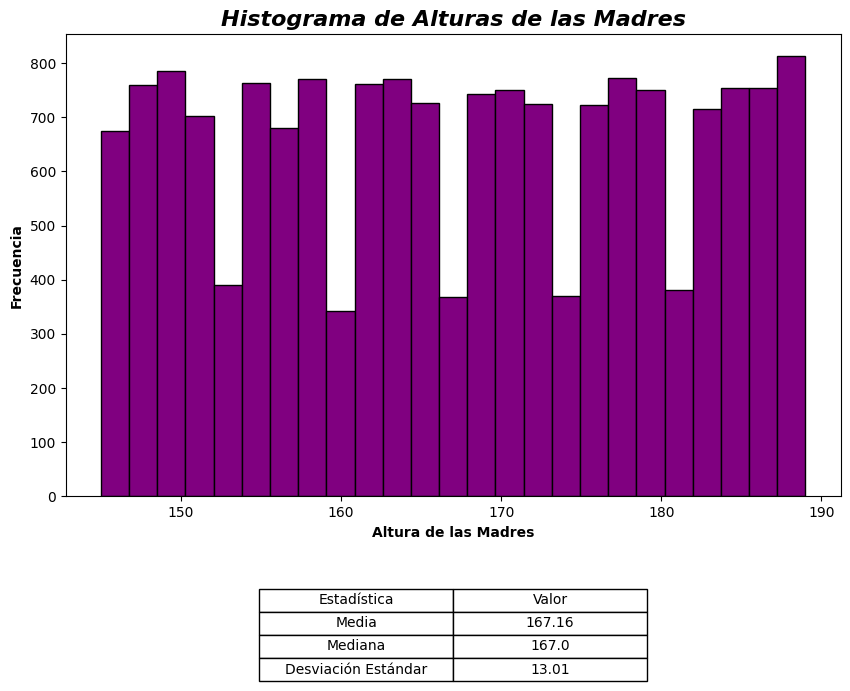

In [8]:
#ALTURAS
# Configurando el tamaño del gráfico
plt.figure(figsize=(10, 6))
# Creando el histograma y guardando los valores con más bins
frequencies, bins, _ = plt.hist(alturas, bins=25, color='purple', edgecolor='black')
# Añadiendo etiquetas y título
plt.title('Histograma de Alturas de las Madres', fontsize=16, fontweight='bold', style='italic')
plt.xlabel('Altura de las Madres', fontweight='bold')
plt.ylabel('Frecuencia', fontweight='bold')
# Creando la tabla con las estadísticas debajo del eje x
tabla = plt.table(cellText=alturas_df.values,
                  colLabels=alturas_df.columns,
                  cellLoc='center', loc='bottom', bbox=[0.25, -0.4, 0.5, 0.2])
# Ajustando el formato de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)

# Mostrando el histograma con la tabla
plt.show()

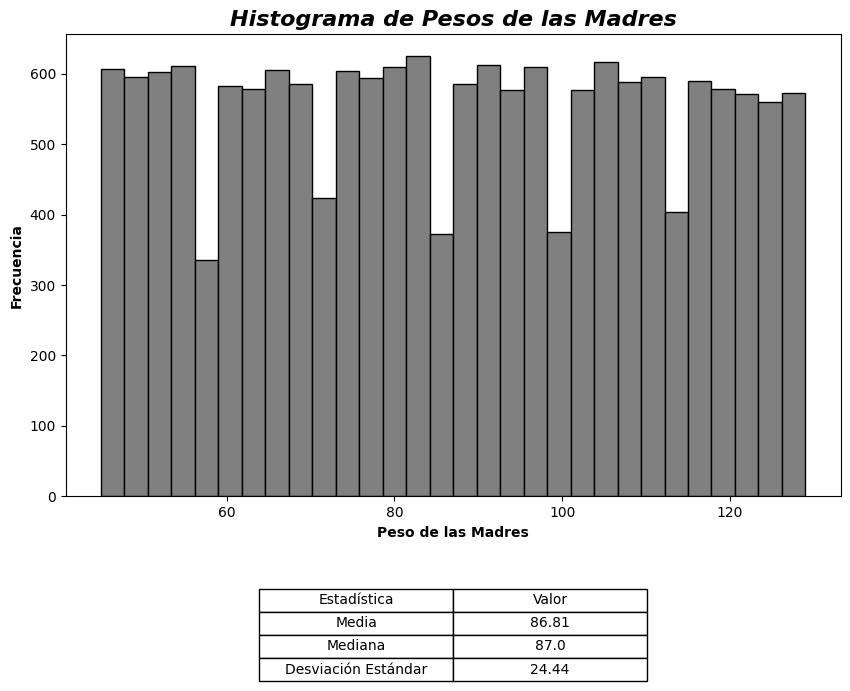

In [9]:
#PESOS
# Configurando el tamaño del gráfico
plt.figure(figsize=(10, 6))
# Creando el histograma y guardando los valores con más bins
frequencies, bins, _ = plt.hist(pesos, bins=30, color='grey', edgecolor='black')
# Añadiendo etiquetas y título
plt.title('Histograma de Pesos de las Madres', fontsize=16, fontweight='bold', style='italic')
plt.xlabel('Peso de las Madres', fontweight='bold')
plt.ylabel('Frecuencia', fontweight='bold')
# Creando la tabla con las estadísticas debajo del eje x
tabla = plt.table(cellText=pesos_df.values,
                  colLabels=pesos_df.columns,
                  cellLoc='center', loc='bottom', bbox=[0.25, -0.4, 0.5, 0.2])
# Ajustando el formato de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)

# Mostrando el histograma con la tabla
plt.show()

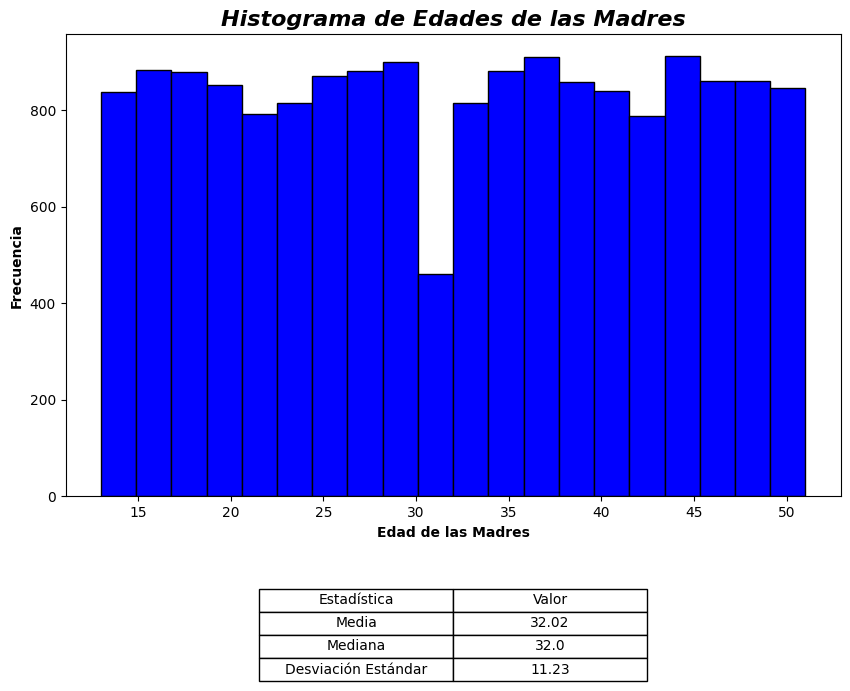

In [10]:
#EDADES
# Configurando el tamaño del gráfico
plt.figure(figsize=(10, 6))
# Creando el histograma y guardando los valores con más bins
frequencies, bins, _ = plt.hist(edades, bins=20, color='blue', edgecolor='black')
# Añadiendo etiquetas y título
plt.title('Histograma de Edades de las Madres', fontsize=16, fontweight='bold', style='italic')
plt.xlabel('Edad de las Madres', fontweight='bold')
plt.ylabel('Frecuencia', fontweight='bold')
# Creando la tabla con las estadísticas debajo del eje x
tabla = plt.table(cellText=edades_df.values,
                  colLabels=edades_df.columns,
                  cellLoc='center', loc='bottom', bbox=[0.25, -0.4, 0.5, 0.2])
# Ajustando el formato de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)

# Mostrando el histograma con la tabla
plt.show()

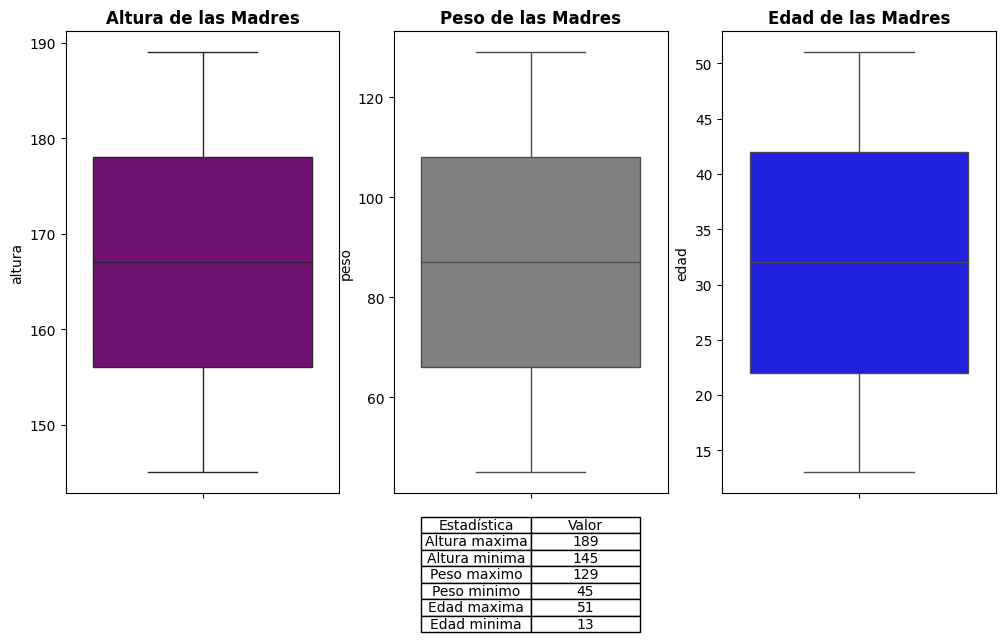

In [11]:
# Boxplots de altura y peso de las madres
plt.figure(figsize=(12, 6))
# Boxplot horizontal de altura
plt.subplot(1, 3, 1)
sns.boxplot(y=df['altura'], color='purple')
plt.title('Altura de las Madres', fontweight='bold')
# Boxplot horizontal de peso
plt.subplot(1, 3, 2)
sns.boxplot(y=df['peso'], color='grey')
plt.title('Peso de las Madres', fontweight='bold')
# Boxplot horizontal de peso
plt.subplot(1, 3, 3)
sns.boxplot(y=df['edad'], color='blue')
plt.title('Edad de las Madres', fontweight='bold')
# Añadiendo valores máximos y mínimos debajo del gráfico
max_altura = df['altura'].max()
min_altura = df['altura'].min()
max_peso = df['peso'].max()
min_peso = df['peso'].min()
max_edad = df['edad'].max()
min_edad = df['edad'].min()
# Generando dataFrame para los maximos y minimos
estadisticas_altura = pd.DataFrame({
    'Estadística': ['Altura maxima', 'Altura minima', 'Peso maximo', 'Peso minimo', 'Edad maxima', 'Edad minima'],
    'Valor': [max_altura, min_altura, max_peso, min_peso, max_edad, min_edad]
})
# Creando la tabla con las estadísticas debajo del eje x
tabla = plt.table(cellText=estadisticas_altura.values,
                  colLabels=estadisticas_altura.columns,
                  cellLoc='center', loc='bottom', bbox=[-1.1, -0.3, 0.8, 0.25])
# Ajustando el formato de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
plt.show()

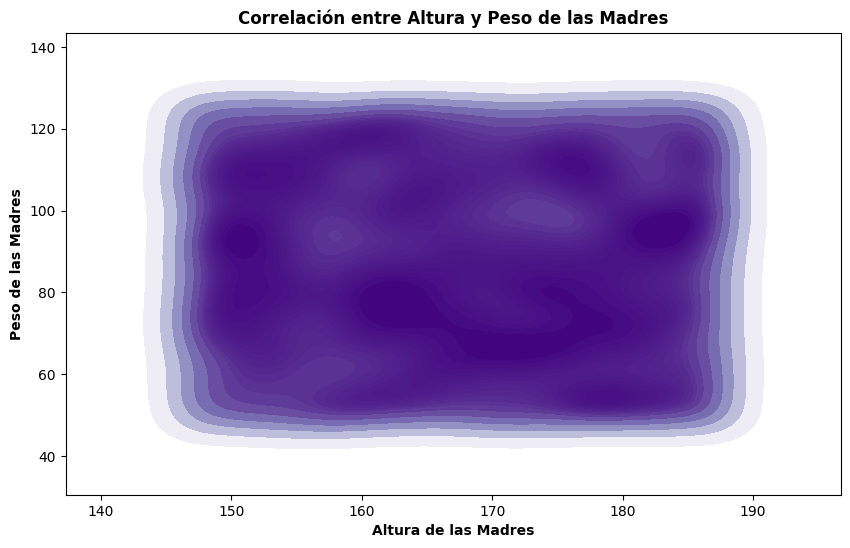

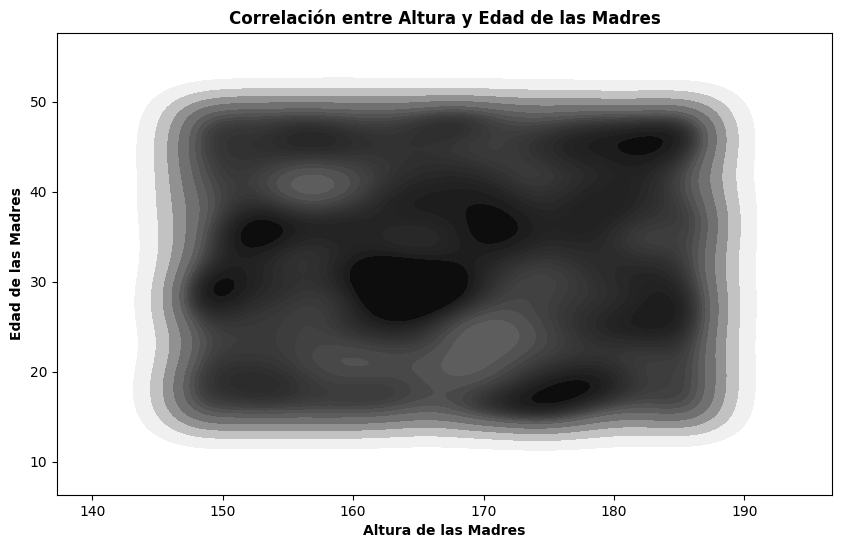

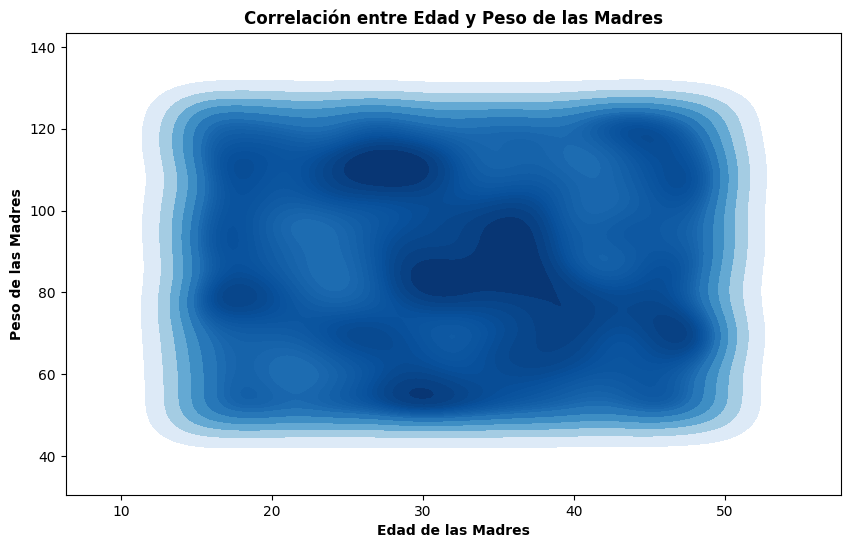

In [12]:
# Crear un gráfico de contorno
plt.figure(figsize=(10, 6))
sns.kdeplot(x='altura', y='peso', data=df, fill=True, cmap='Purples', levels=20)
plt.title('Correlación entre Altura y Peso de las Madres', fontweight='bold')
plt.xlabel('Altura de las Madres', fontweight='bold')
plt.ylabel('Peso de las Madres', fontweight='bold')
plt.show()
# Crear un gráfico de contorno
plt.figure(figsize=(10, 6))
sns.kdeplot(x='altura', y='edad', data=df, fill=True, cmap='Greys', levels=20)
plt.title('Correlación entre Altura y Edad de las Madres', fontweight='bold')
plt.xlabel('Altura de las Madres', fontweight='bold')
plt.ylabel('Edad de las Madres', fontweight='bold')
plt.show()
# Crear un gráfico de contorno
plt.figure(figsize=(10, 6))
sns.kdeplot(x='edad', y='peso', data=df, fill=True, cmap='Blues', levels=20)
plt.title('Correlación entre Edad y Peso de las Madres', fontweight='bold')
plt.xlabel('Edad de las Madres', fontweight='bold')
plt.ylabel('Peso de las Madres', fontweight='bold')
plt.show()

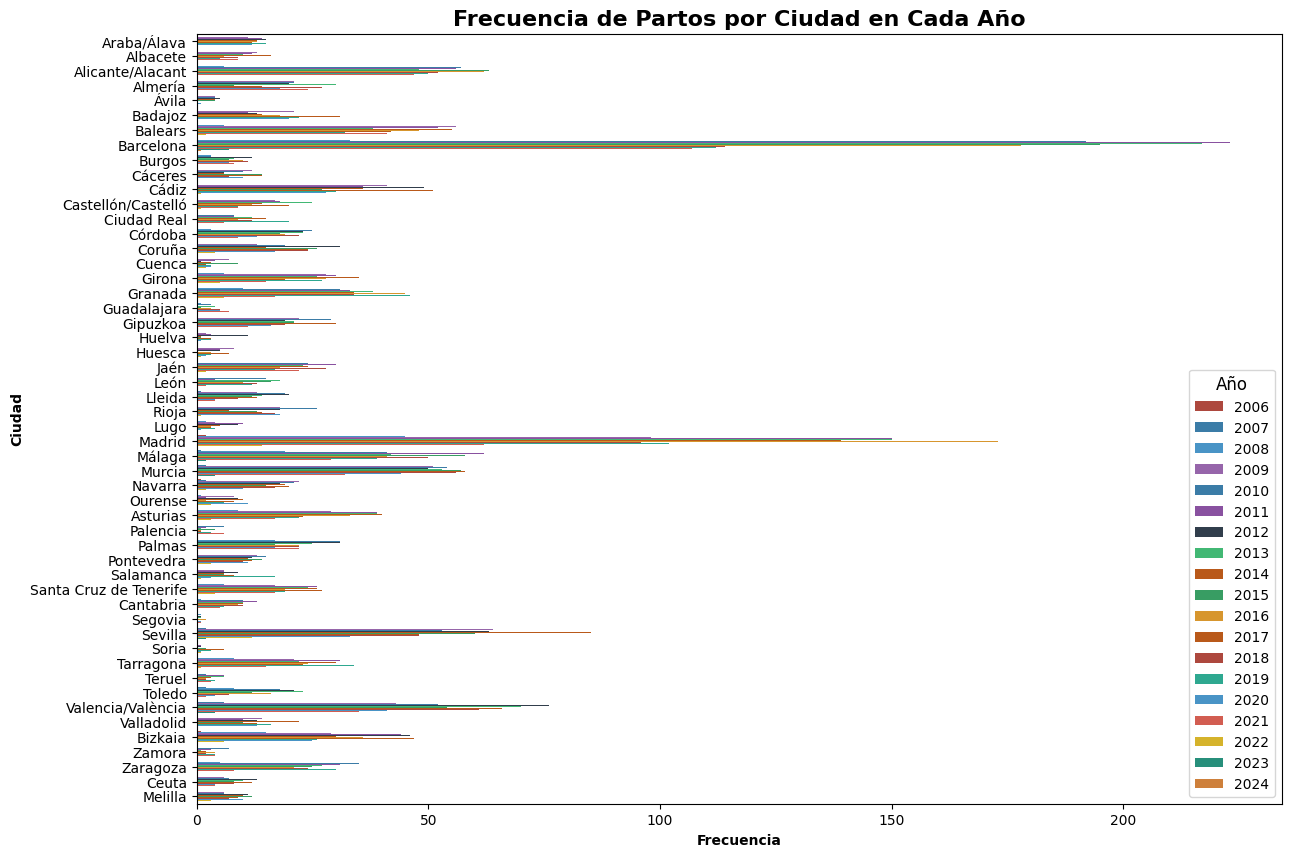

In [13]:
#2. **Frecuencia de Partos por Ciudad:**
#   - Gráfico de la frecuencia de partos en cada ciudad.
#   - Tablas de relacion entre ciudades con altura, peso y edad (media, mediana, desviación estándar).
plt.figure(figsize=(14, 10))
# Generando colores para los anios
clr_por_anio = {}
for anio in df['periodo'].unique().tolist():
    clr_por_anio[anio] = np.random.choice(colores)
    colores.remove(clr_por_anio[anio])
sns.countplot(y='ciudades', hue='periodo', data=df, palette=clr_por_anio, dodge=True)
plt.title('Frecuencia de Partos por Ciudad en Cada Año', fontsize=16, fontweight='bold')
plt.ylabel('Ciudad', fontweight='bold')
plt.xlabel('Frecuencia', fontweight='bold')
plt.legend(title='Año', title_fontsize='12')
plt.show()

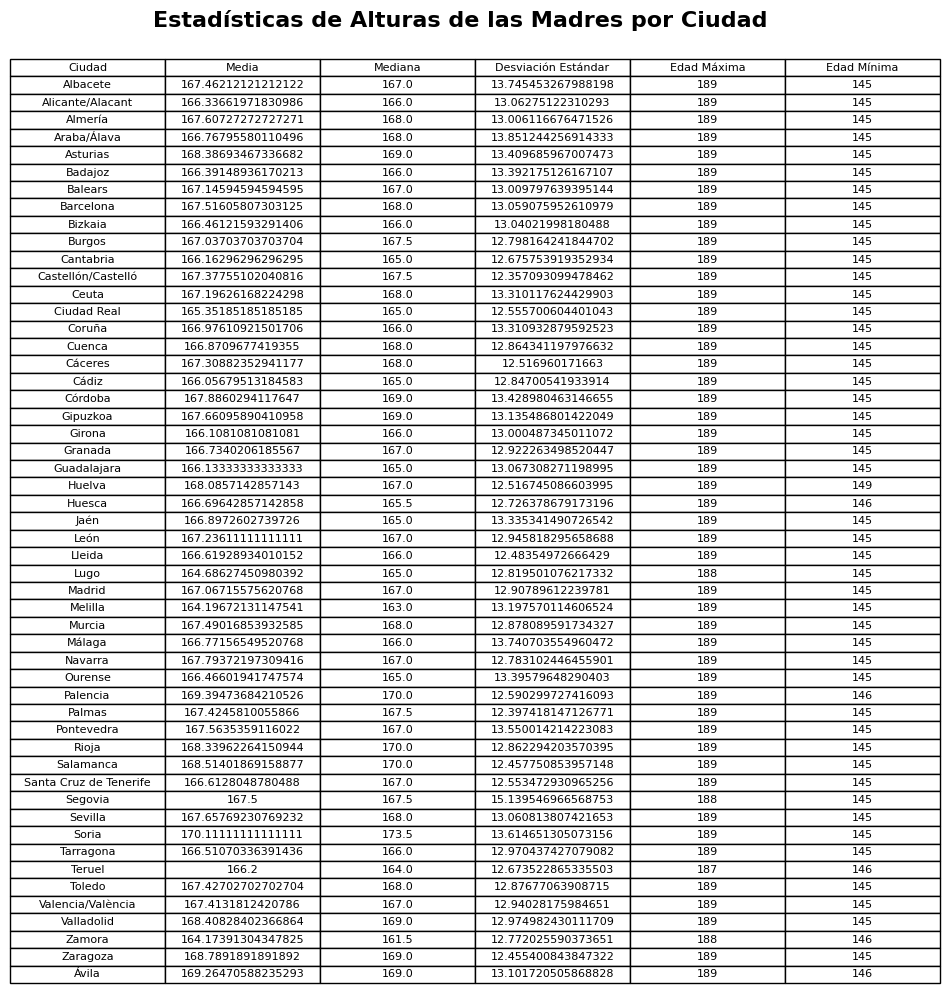

In [14]:
# Calculando estadísticas descriptivas para las edades de las madres por ciudad
stats_por_ciudad = df.groupby('ciudades')['altura'].agg(['mean', 'median', 'std', 'max', 'min']).reset_index()
# Renombrando las columnas para mayor claridad
stats_por_ciudad.columns = ['Ciudad', 'Media', 'Mediana', 'Desviación Estándar', 'Edad Máxima', 'Edad Mínima']
# Ordenando las ciudades en orden alfabético
stats_por_ciudad = stats_por_ciudad.sort_values(by='Ciudad')
# Configurando el tamaño del gráfico
plt.figure(figsize=(12, 8))
# Creando la tabla con las estadísticas debajo del eje x
tabla_edades = plt.table(cellText=stats_por_ciudad.values,
                         colLabels=stats_por_ciudad.columns,
                         cellLoc='center', loc='center', bbox=[0, -0.45, 1, 1.5])
# Ajustando el formato de la tabla
tabla_edades.auto_set_font_size(False)
tabla_edades.set_fontsize(8)
# Ocultando ejes
plt.axis('off')
# Añadiendo un título descriptivo
plt.suptitle('Estadísticas de Alturas de las Madres por Ciudad', fontsize=16, fontweight='bold')
plt.show()

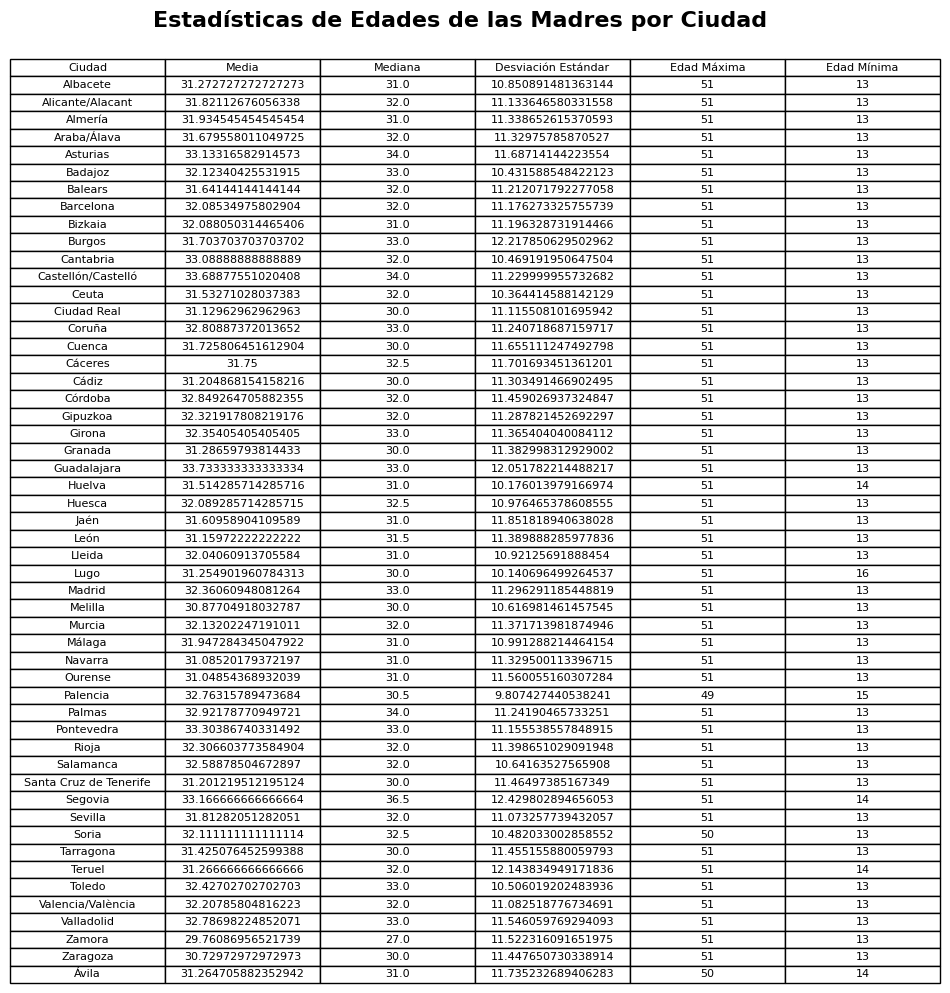

In [15]:
# Calculando estadísticas descriptivas para las edades de las madres por ciudad
stats_por_ciudad = df.groupby('ciudades')['edad'].agg(['mean', 'median', 'std', 'max', 'min']).reset_index()
# Renombrando las columnas para mayor claridad
stats_por_ciudad.columns = ['Ciudad', 'Media', 'Mediana', 'Desviación Estándar', 'Edad Máxima', 'Edad Mínima']
# Ordenando las ciudades en orden alfabético
stats_por_ciudad = stats_por_ciudad.sort_values(by='Ciudad')
# Configurando el tamaño del gráfico
plt.figure(figsize=(12, 8))
# Creando la tabla con las estadísticas debajo del eje x
tabla_edades = plt.table(cellText=stats_por_ciudad.values,
                         colLabels=stats_por_ciudad.columns,
                         cellLoc='center', loc='center', bbox=[0, -0.45, 1, 1.5])
# Ajustando el formato de la tabla
tabla_edades.auto_set_font_size(False)
tabla_edades.set_fontsize(8)
# Ocultando ejes
plt.axis('off')
# Añadiendo un título descriptivo
plt.suptitle('Estadísticas de Edades de las Madres por Ciudad', fontsize=16, fontweight='bold')
plt.show()

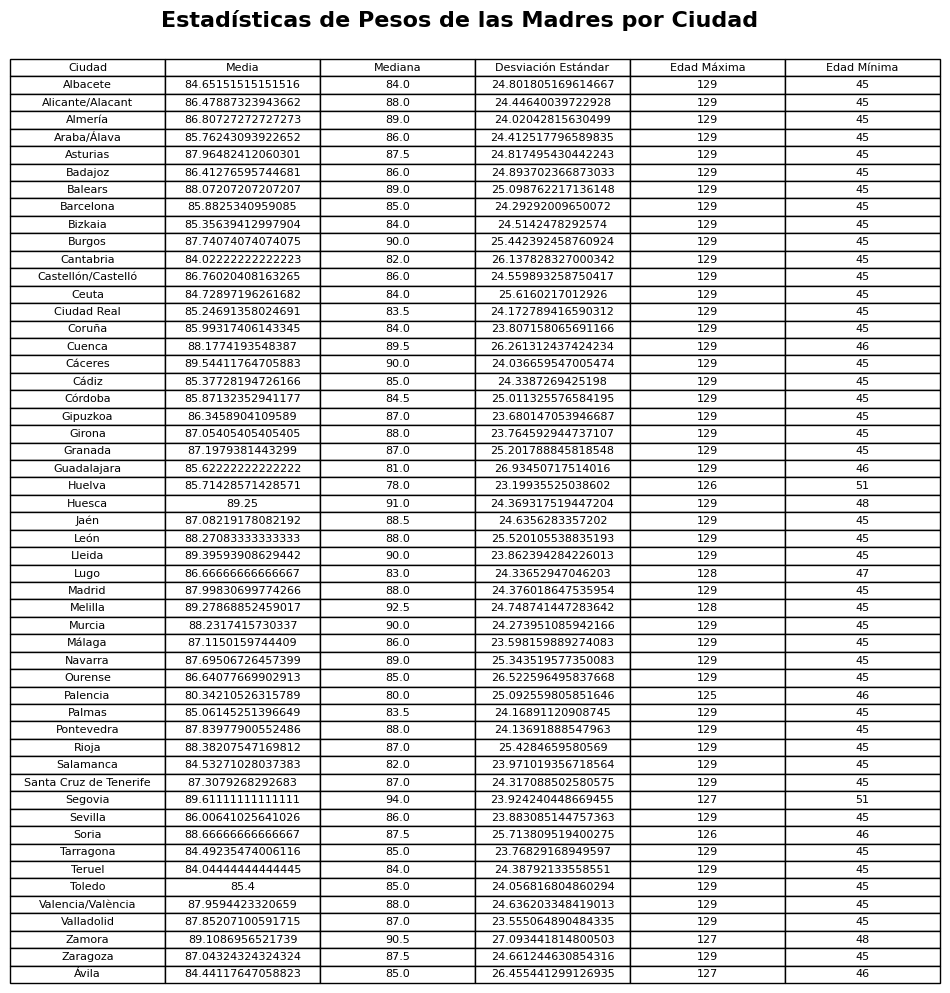

In [16]:
# Calculando estadísticas descriptivas para las edades de las madres por ciudad
stats_por_ciudad = df.groupby('ciudades')['peso'].agg(['mean', 'median', 'std', 'max', 'min']).reset_index()
# Renombrando las columnas para mayor claridad
stats_por_ciudad.columns = ['Ciudad', 'Media', 'Mediana', 'Desviación Estándar', 'Edad Máxima', 'Edad Mínima']
# Ordenando las ciudades en orden alfabético
stats_por_ciudad = stats_por_ciudad.sort_values(by='Ciudad')
# Configurando el tamaño del gráfico
plt.figure(figsize=(12, 8))
# Creando la tabla con las estadísticas debajo del eje x
tabla_edades = plt.table(cellText=stats_por_ciudad.values,
                         colLabels=stats_por_ciudad.columns,
                         cellLoc='center', loc='center', bbox=[0, -0.45, 1, 1.5])
# Ajustando el formato de la tabla
tabla_edades.auto_set_font_size(False)
tabla_edades.set_fontsize(8)
# Ocultando ejes
plt.axis('off')
# Añadiendo un título descriptivo
plt.suptitle('Estadísticas de Pesos de las Madres por Ciudad', fontsize=16, fontweight='bold')
plt.show()

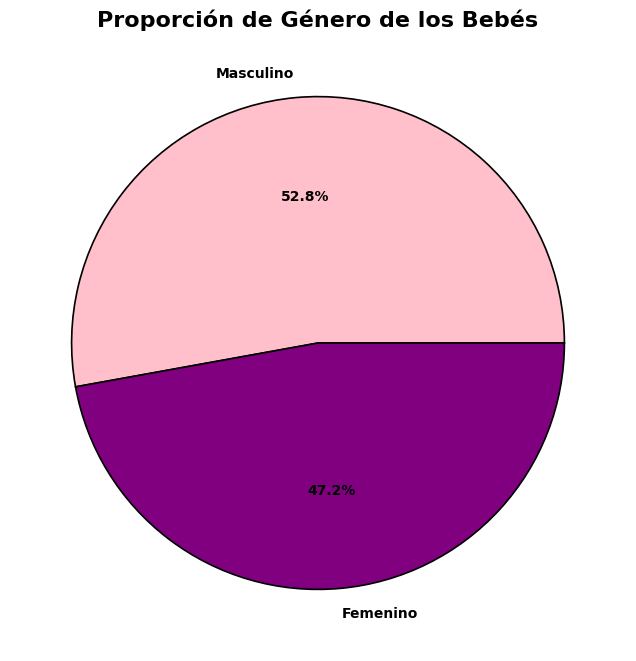

In [17]:
#3. **Frecuencia de Género de los Bebés:**
#   - Gráfico que muestra la proporción de bebés por género.
# Reemplazar 'F' por 'Femenino' y 'M' por 'Masculino'
df['sexo'] = df['sexo'].replace({'F': 'Femenino', 'M': 'Masculino'})
# Calculando la frecuencia de género
frecuencia_genero = df['sexo'].value_counts()
plt.figure(figsize=(8, 8))
# Agregando bordes y líneas
plt.pie(frecuencia_genero, labels=frecuencia_genero.index, autopct='%1.1f%%',
        colors=['pink', 'purple'], wedgeprops=dict(edgecolor='black', linewidth=1.2))
plt.title('Proporción de Género de los Bebés', fontsize=16, fontweight='bold')
# Haciendo el texto en negrita
for text in plt.gca().texts:
    text.set_fontweight('bold')
plt.show()

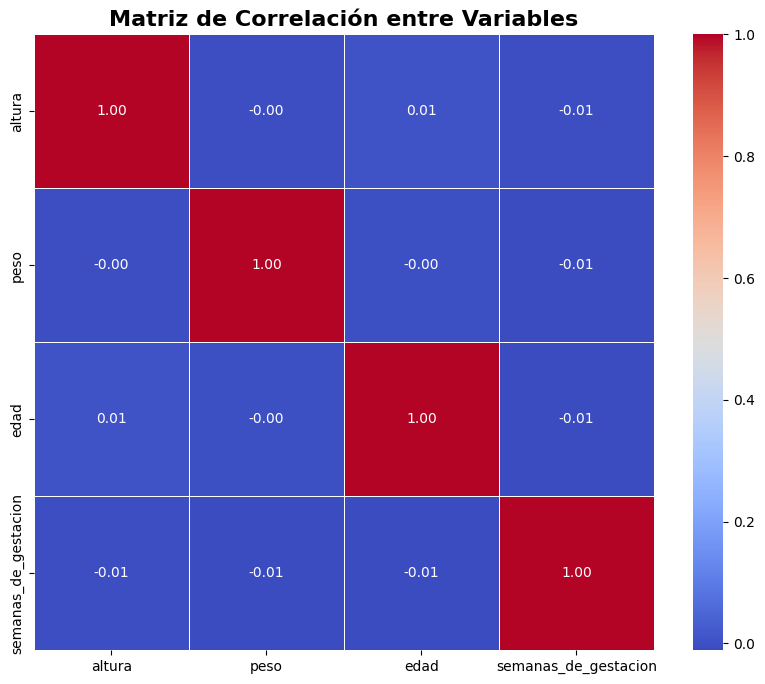

In [18]:
#4. **Correlación entre Variables:**
#   - Matriz de correlación entre altura, peso, edad y semanas de gestación.
# Selecciona las columnas relevantes para la matriz de correlación
variables = ['altura', 'peso', 'edad', 'semanas_de_gestacion']
correlacion_variables = df[variables].corr()
# Configura el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Crea un mapa de calor con seaborn
sns.heatmap(correlacion_variables, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Añade título
plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold')
# Muestra el gráfico
plt.show()

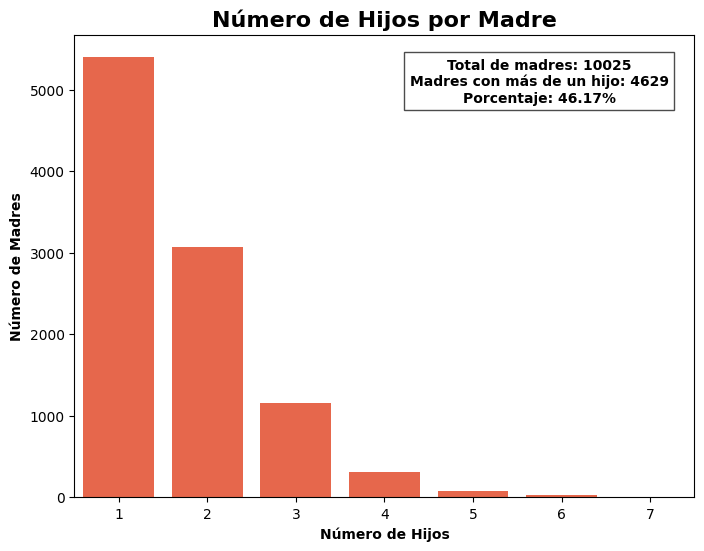

In [19]:
#5. **Número de Hijos por Madre:**
#   - Conteo de cuántas madres tienen más de un hijo.
# Conteo de hijos por madre
num_hijos_por_madre = df['id'].value_counts()
# Filtrar madres con más de un hijo
madres_con_mas_de_un_hijo = num_hijos_por_madre[num_hijos_por_madre > 1]
# Número total de madres
num_total_madres = len(df['id'].unique())
# Número de madres con más de un hijo
num_madres_mas_de_un_hijo = len(madres_con_mas_de_un_hijo)
# Porcentaje de madres con más de un hijo
porcentaje_madres_mas_de_un_hijo = (num_madres_mas_de_un_hijo / num_total_madres) * 100
# Visualización
plt.figure(figsize=(8, 6))
sns.countplot(x=num_hijos_por_madre, color=np.random.choice(colores))
plt.title('Número de Hijos por Madre', fontsize=16, fontweight='bold')
plt.xlabel('Número de Hijos', fontweight='bold')
plt.ylabel('Número de Madres', fontweight='bold')
# Información en el gráfico
info_text = f"Total de madres: {num_total_madres}\nMadres con más de un hijo: {num_madres_mas_de_un_hijo}\nPorcentaje: {porcentaje_madres_mas_de_un_hijo:.2f}%"
plt.text(0.75, 0.90, info_text, transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7), fontweight='bold')
plt.show()

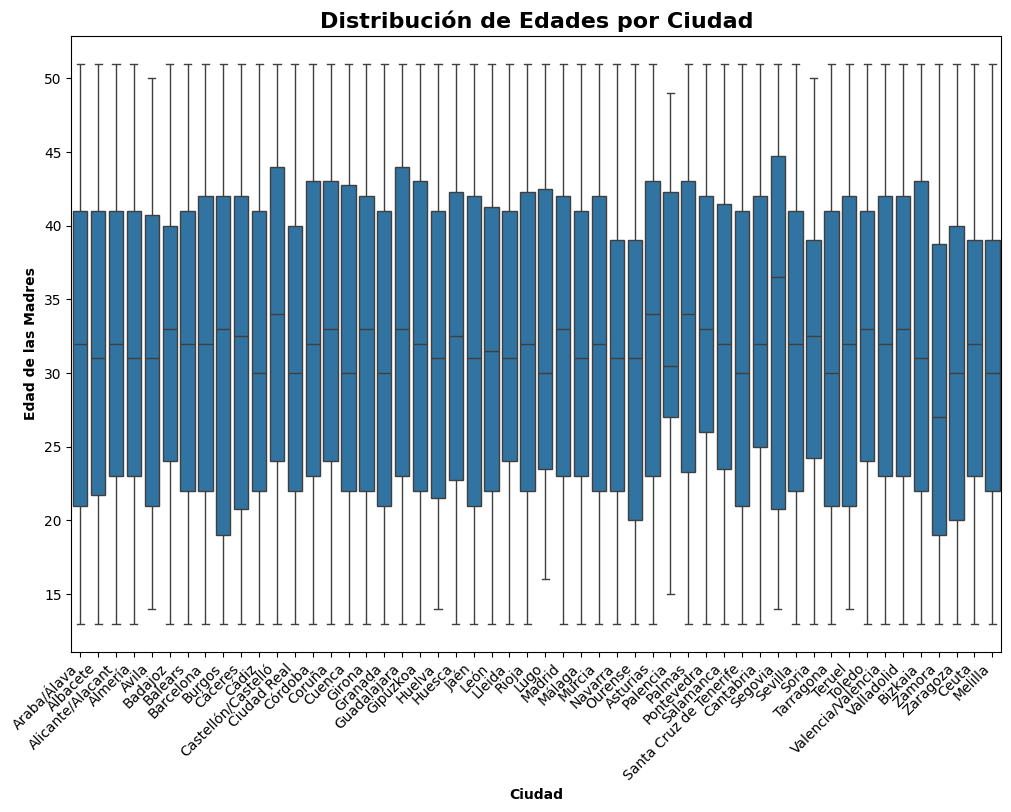

In [20]:
#6. **Distribución de Edades por Ciudad:**
#   - Boxplot de edades de las madres para cada ciudad.
plt.figure(figsize=(12, 8))
sns.boxplot(x='ciudades', y='edad', data=df, orient='v')
plt.title('Distribución de Edades por Ciudad', fontsize=16, fontweight='bold')
plt.xlabel('Ciudad', fontweight='bold')
plt.ylabel('Edad de las Madres', fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas para mayor legibilidad
plt.show()

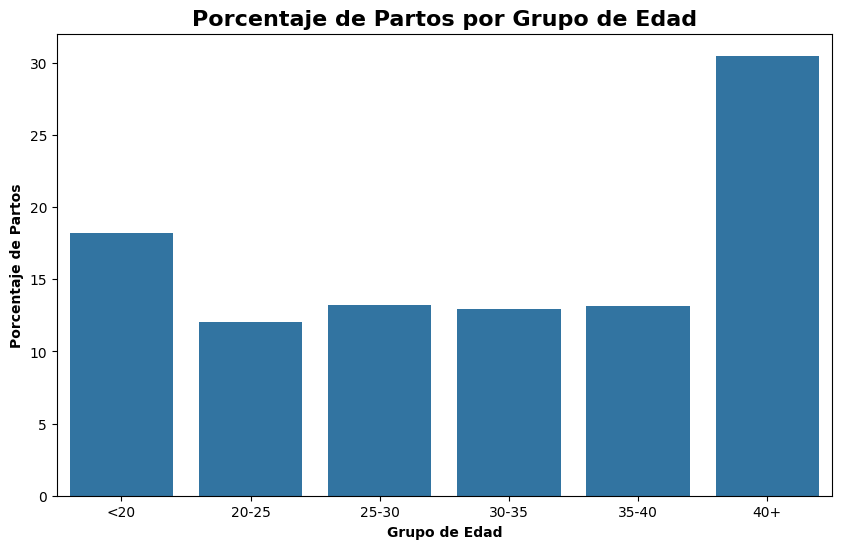

In [21]:
#7. **Riesgos de Parto por Edad:**
#   - Gráfico de barras que muestra el porcentaje de partos por grupo de edad.
#   - Gráfico de área apilada que muestre el porcentaje de riesgo por edades
#   - Gráficos que muestren porcentajes por ciudades de cada riesgo
# Crear grupos de edad
bins = [0, 20, 25, 30, 35, 40, 100]  # Define los límites de los grupos
labels = ['<20', '20-25', '25-30', '30-35', '35-40', '40+']  # Etiquetas para los grupos
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)
# Calcular porcentaje de partos por grupo de edad
porcentaje_partos_por_edad = df['grupo_edad'].value_counts(normalize=True) * 100
# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentaje_partos_por_edad.index, y=porcentaje_partos_por_edad.values)
plt.title('Porcentaje de Partos por Grupo de Edad', fontsize=16, fontweight='bold')
plt.xlabel('Grupo de Edad', fontweight='bold')
plt.ylabel('Porcentaje de Partos', fontweight='bold')
plt.show()

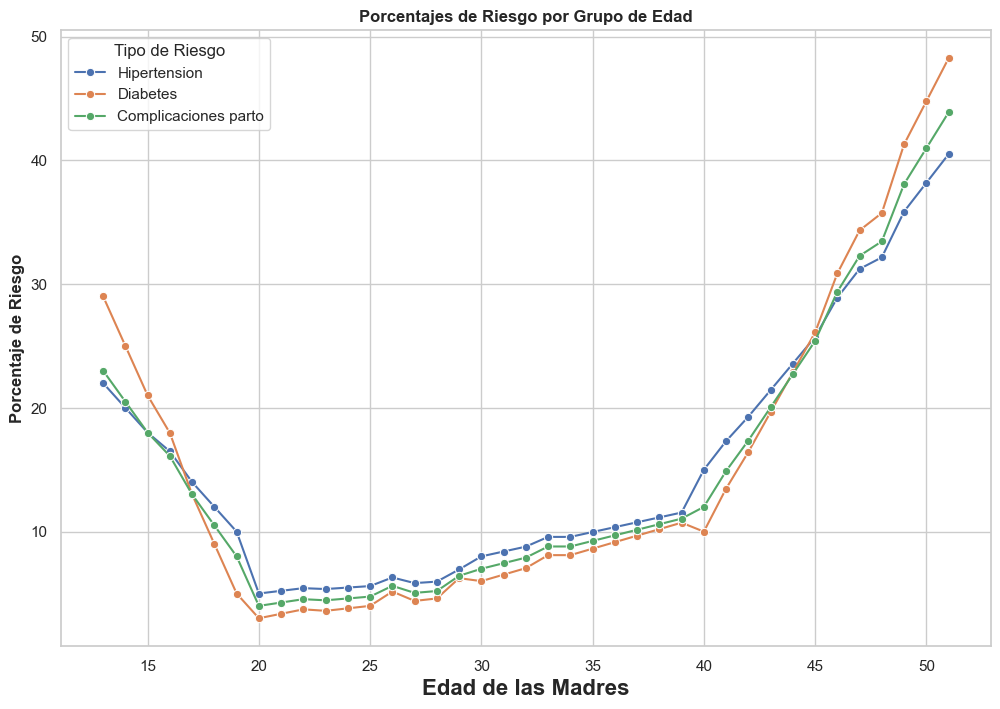

In [22]:

datos_riesgos = []
for edad in list(df['edad'].unique()):
    riesgos_edad = list(cal_riesgos_edad(edad=edad))
    riesgos_edad.insert(0, edad)
    datos_riesgos.append(riesgos_edad)
# Organizando columnas esteticamente
columnas_resultados = [capitalizar_reemplazar(i) for i in list(df_riesgos.columns)]
df_resultados_riesgos = pd.DataFrame(datos_riesgos, columns=columnas_resultados)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un DataFrame apilado
df_stacked = df_resultados_riesgos.melt(id_vars='Edad', var_name='Riesgo', value_name='Porcentaje')

# Crear el gráfico de área apilada
plt.figure(figsize=(12, 8))
sns.lineplot(x='Edad', y='Porcentaje', hue='Riesgo', data=df_stacked, marker='o')

plt.title('Porcentajes de Riesgo por Grupo de Edad', fontweight='bold')
plt.xlabel('Edad de las Madres', fontsize=16, fontweight='bold')
plt.ylabel('Porcentaje de Riesgo', fontweight='bold')
plt.legend(title='Tipo de Riesgo')
plt.show()

In [23]:
df_resultados_riesgos.rename(columns={'Edad': 'edad', 'Hipertension':'hipertension', 'Complicaciones parto':'complicaciones_parto', 'Diabetes':'diabetes'}, inplace=True)
union_datos_df = pd.merge(df, df_resultados_riesgos, on='edad')
union_datos_df = union_datos_df.drop(columns=['altura', 'peso', 'mes', 'sexo', 'edad', 'periodo', 'grupo_edad'])
union_datos_df.sort_values(by=['ciudades', 'semanas_de_gestacion'], inplace=True)
# Definir los valores de y para cada columna (VALORES DEL AUMENTO DE PORCENTAJE DE RIESGO FICTICIOS)
y_values = {'hipertension': 0.2, 'diabetes': 0.35, 'complicaciones_parto': 0.78}
# Aplicar la fórmula a cada columna
for column in ['hipertension', 'diabetes', 'complicaciones_parto']:
    union_datos_df[column] = ((union_datos_df['semanas_de_gestacion'].max() - union_datos_df['semanas_de_gestacion']) * y_values[column])+union_datos_df[column]
union_datos_df = union_datos_df[['id', 'ciudades', 'hipertension', 'diabetes', 'complicaciones_parto']]
union_datos_df

,id,ciudades,hipertension,diabetes,complicaciones_parto
1760,2159997252,Albacete,33.430667,38.196,40.868333
3027,2896778842,Albacete,8.160000,8.450,13.780000
3938,8864825066,Albacete,27.930000,29.945,33.992500
3940,6897694131,Albacete,27.930000,29.945,33.992500
4403,3001090390,Albacete,21.492000,20.288,25.945000
...,...,...,...,...,...
2658,9672324749,Ávila,5.680000,4.150,5.380000
3056,4103326656,Ávila,6.160000,4.950,5.980000
14184,5681255809,Ávila,16.486000,17.972,16.107500
15468,4556549809,Ávila,9.575000,8.100,8.800000


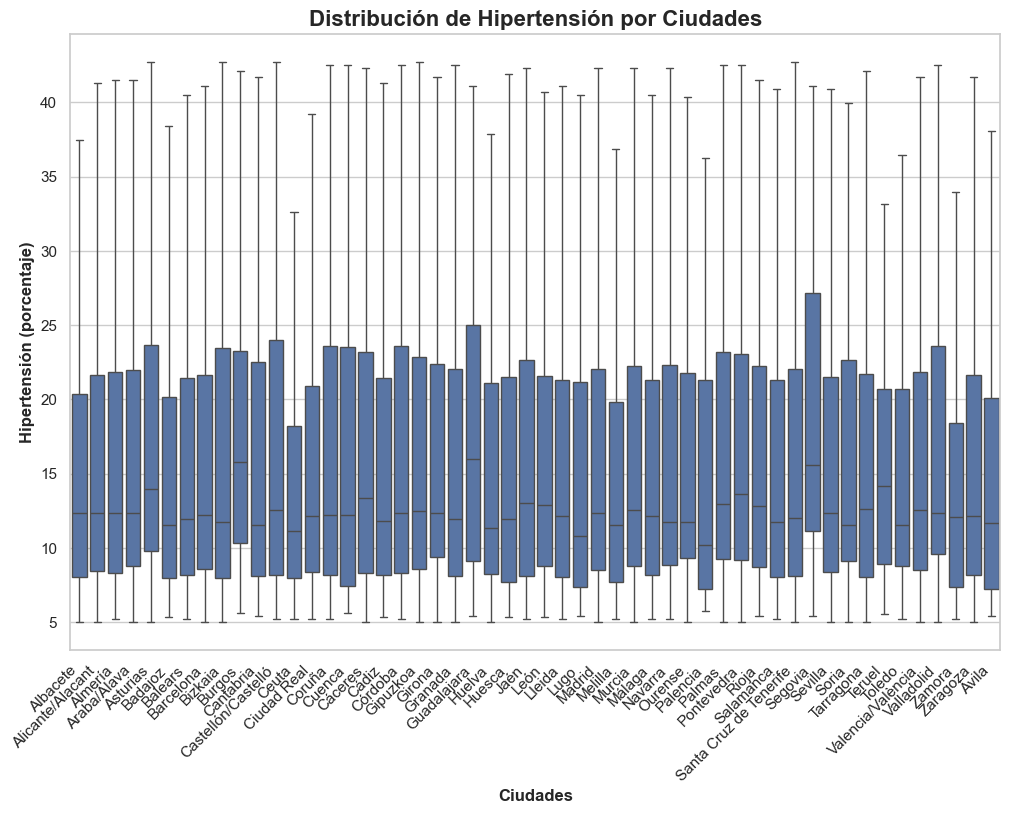

In [24]:
# Crear un boxplot de distribucion de riesgo de hipertension por ciudades
plt.figure(figsize=(12, 8))
sns.boxplot(x='ciudades', y='hipertension', data=union_datos_df, showfliers=False)
plt.title('Distribución de Hipertensión por Ciudades', fontsize=16, fontweight='bold')
plt.xlabel('Ciudades', fontweight='bold')
plt.ylabel('Hipertensión (porcentaje)', fontweight='bold')
plt.xticks(rotation=45, ha='right') 
plt.show()

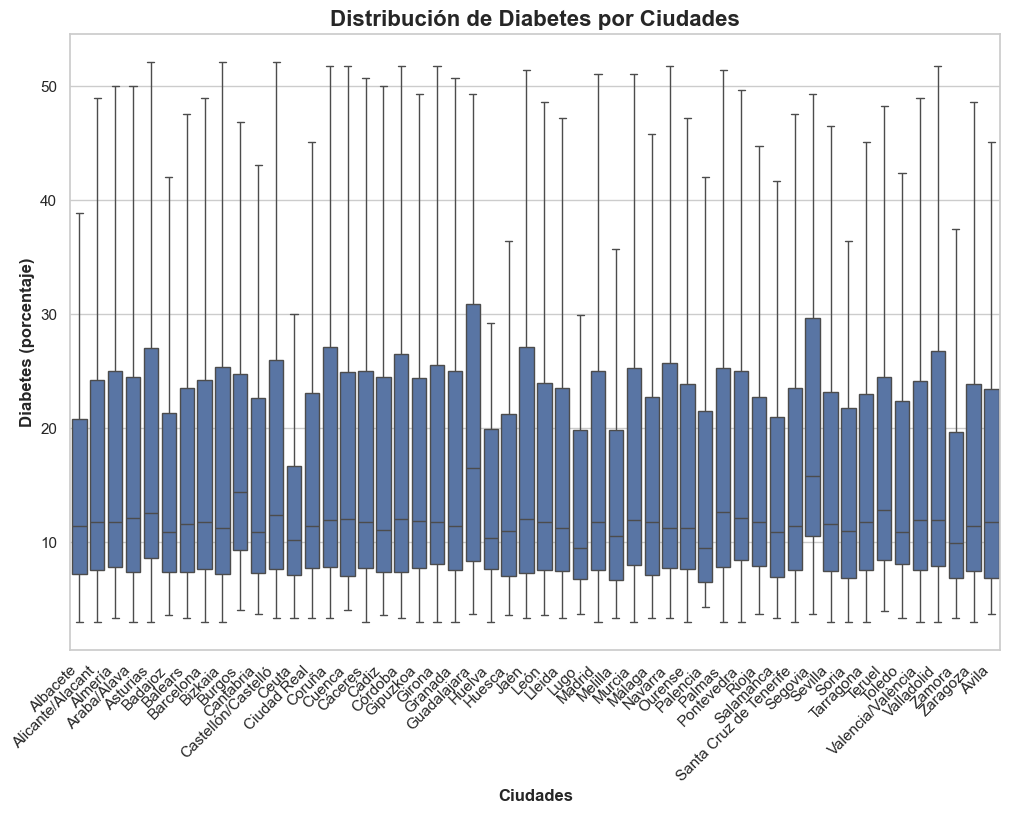

In [25]:
# Crear un boxplot de distribucion de riesgo de diabetes por ciudades
plt.figure(figsize=(12, 8))
sns.boxplot(x='ciudades', y='diabetes', data=union_datos_df, showfliers=False)
plt.title('Distribución de Diabetes por Ciudades', fontsize=16, fontweight='bold')
plt.xlabel('Ciudades', fontweight='bold')
plt.ylabel('Diabetes (porcentaje)', fontweight='bold')
plt.xticks(rotation=45, ha='right') 
plt.show()

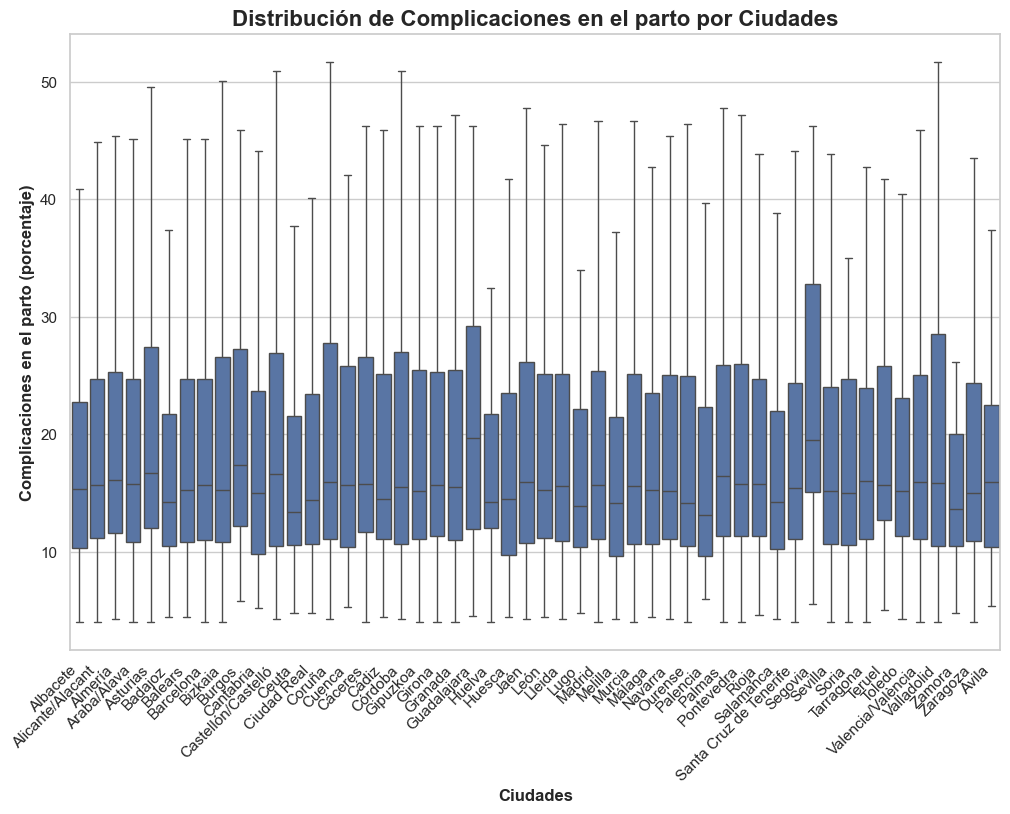

In [26]:
# Crear un boxplot de distribucion de riesgo de complicaciones en el parto por ciudades
plt.figure(figsize=(12, 8))
sns.boxplot(x='ciudades', y='complicaciones_parto', data=union_datos_df, showfliers=False)
plt.title('Distribución de Complicaciones en el parto por Ciudades', fontsize=16, fontweight='bold')
plt.xlabel('Ciudades', fontweight='bold')
plt.ylabel('Complicaciones en el parto (porcentaje)', fontweight='bold')
plt.xticks(rotation=45, ha='right') 
plt.show()

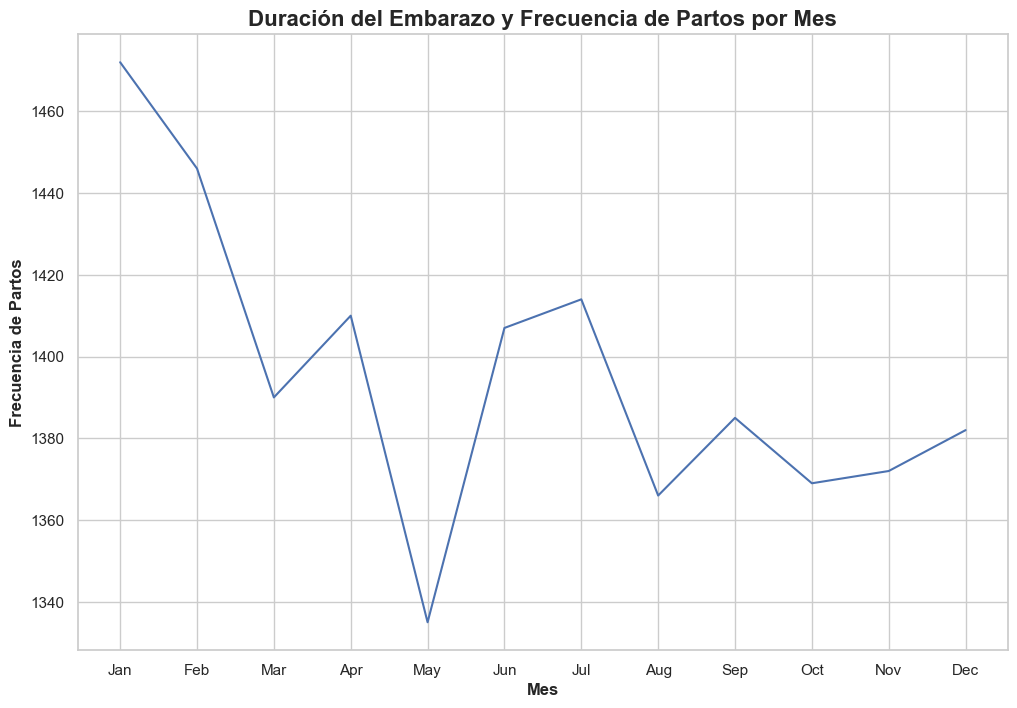

In [27]:
#8. **Duración del Embarazo y Frecuencia de Partos por Mes:**
#   - Gráfico de líneas que muestra la frecuencia de partos por mes, considerando la duración del embarazo.
# Crear un gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(x='mes', y='semanas_de_gestacion', data=df, estimator='count', errorbar=None)

# Añadir etiquetas y título
plt.title('Duración del Embarazo y Frecuencia de Partos por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontweight='bold')
plt.ylabel('Frecuencia de Partos', fontweight='bold')

# Mostrar el gráfico
plt.show()

In [28]:
]

SyntaxError: unmatched ']' (1890416573.py, line 1)